In [8]:
from __future__ import division

import numpy as np
import pandas as pd

import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [10]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='month'>

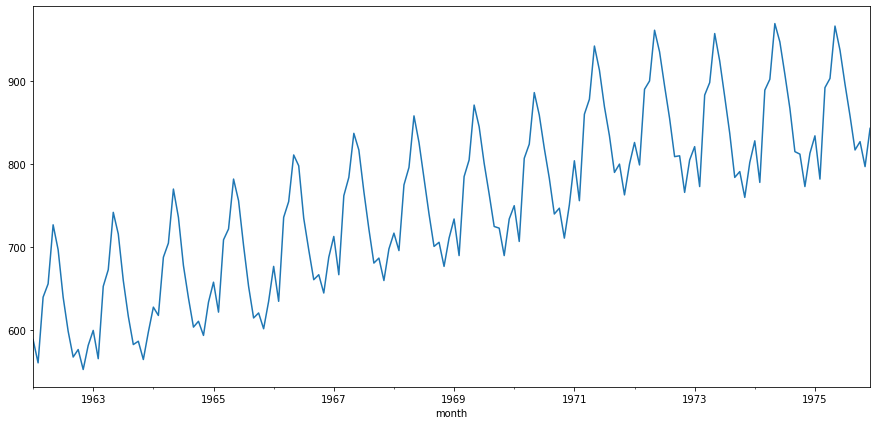

In [11]:
plt.figure(figsize(15,7))
milk.milk.plot()
pylab.show()

<Figure size 1080x576 with 0 Axes>

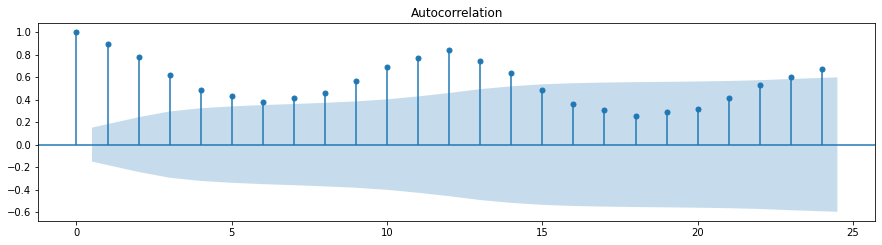

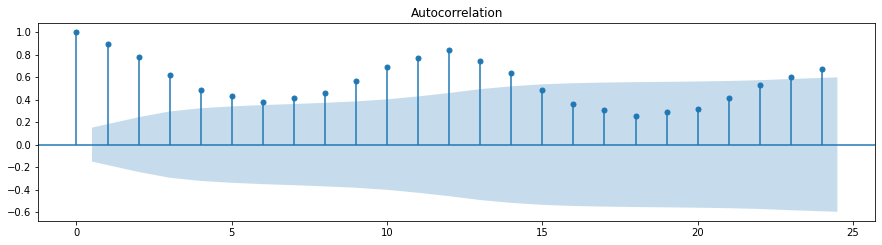

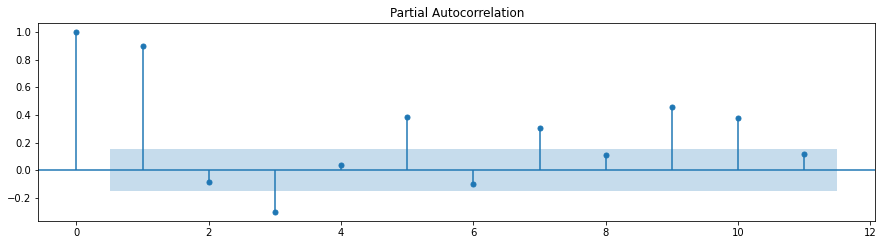

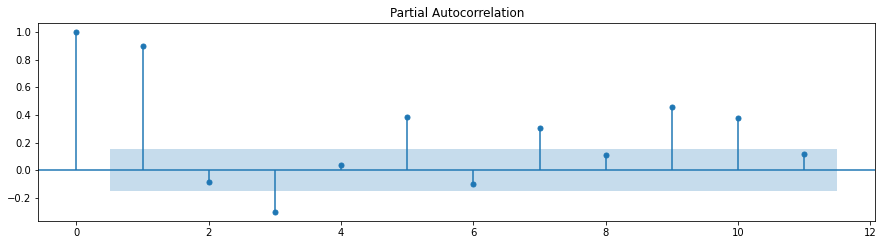

In [12]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(milk.milk.values.squeeze(), lags=24, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(milk.milk.values.squeeze(), lags=11, ax=ax)
pylab.show()

In [13]:
import statsmodels.api as sm
print("Критерий Дики-Фулера: p-value = %f" % sm.tsa.stattools.adfuller(milk.milk)[1])

Критерий Дики-Фулера: p-value = 0.627427


Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

In [14]:
milk.milk.values

array([589, 561, 640, 656, 727, 697, 640, 599, 568, 577, 553, 582, 600,
       566, 653, 673, 742, 716, 660, 617, 583, 587, 565, 598, 628, 618,
       688, 705, 770, 736, 678, 639, 604, 611, 594, 634, 658, 622, 709,
       722, 782, 756, 702, 653, 615, 621, 602, 635, 677, 635, 736, 755,
       811, 798, 735, 697, 661, 667, 645, 688, 713, 667, 762, 784, 837,
       817, 767, 722, 681, 687, 660, 698, 717, 696, 775, 796, 858, 826,
       783, 740, 701, 706, 677, 711, 734, 690, 785, 805, 871, 845, 801,
       764, 725, 723, 690, 734, 750, 707, 807, 824, 886, 859, 819, 783,
       740, 747, 711, 751, 804, 756, 860, 878, 942, 913, 869, 834, 790,
       800, 763, 800, 826, 799, 890, 900, 961, 935, 894, 855, 809, 810,
       766, 805, 821, 773, 883, 898, 957, 924, 881, 837, 784, 791, 760,
       802, 828, 778, 889, 902, 969, 947, 908, 867, 815, 812, 773, 813,
       834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843])

In [15]:
# flatten() - вовзращает копию массива, сжатого до одного измерения
milk.milk.values.flatten()

array([589, 561, 640, 656, 727, 697, 640, 599, 568, 577, 553, 582, 600,
       566, 653, 673, 742, 716, 660, 617, 583, 587, 565, 598, 628, 618,
       688, 705, 770, 736, 678, 639, 604, 611, 594, 634, 658, 622, 709,
       722, 782, 756, 702, 653, 615, 621, 602, 635, 677, 635, 736, 755,
       811, 798, 735, 697, 661, 667, 645, 688, 713, 667, 762, 784, 837,
       817, 767, 722, 681, 687, 660, 698, 717, 696, 775, 796, 858, 826,
       783, 740, 701, 706, 677, 711, 734, 690, 785, 805, 871, 845, 801,
       764, 725, 723, 690, 734, 750, 707, 807, 824, 886, 859, 819, 783,
       740, 747, 711, 751, 804, 756, 860, 878, 942, 913, 869, 834, 790,
       800, 763, 800, 826, 799, 890, 900, 961, 935, 894, 855, 809, 810,
       766, 805, 821, 773, 883, 898, 957, 924, 881, 837, 784, 791, 760,
       802, 828, 778, 889, 902, 969, 947, 908, 867, 815, 812, 773, 813,
       834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843])

In [16]:
milk.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='month', length=168, freq=None)

In [17]:
milk.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='month', length=168)

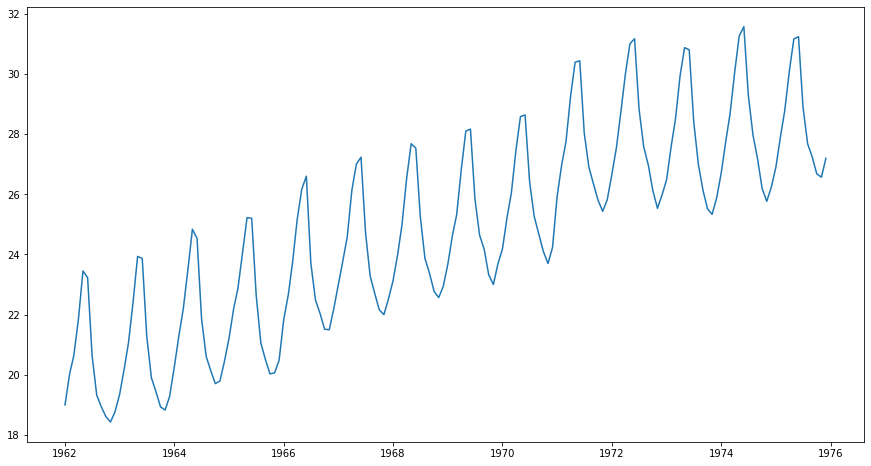

In [18]:
milk['daily'] = milk.milk.values.flatten() / milk.index.days_in_month
_ = plt.plot(milk.index, milk.daily)

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [19]:
print("%f" % milk.daily.values.sum())

4166.326662


Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

milk.daily_diff12 = milk.daily - milk.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

<ipython-input-20-dc126ba64700>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff1 = milk.daily - milk.daily.shift(1)


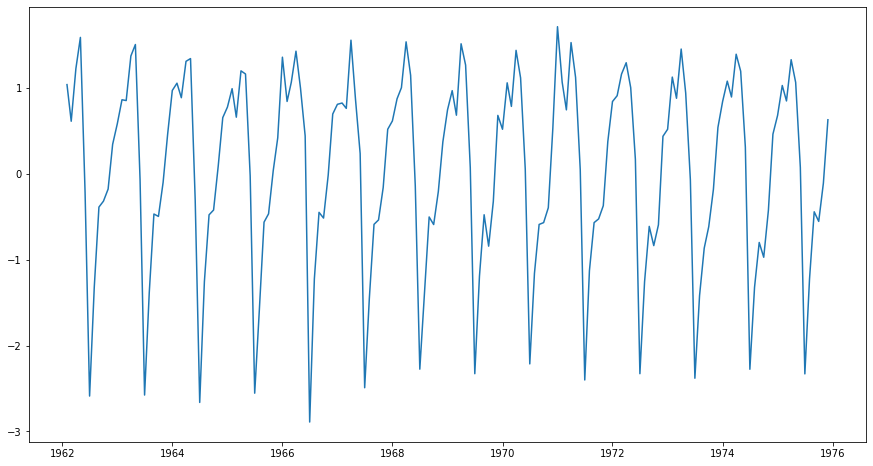

In [20]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
_ = plt.plot(milk.index, milk.daily_diff1)

In [22]:
sm.tsa.stattools.adfuller?

In [21]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-2.7594694762289533,
 0.06430054654174037,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.153997338105512)

<ipython-input-23-be6c277cf8c3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff12 = milk.daily - milk.daily.shift(12)


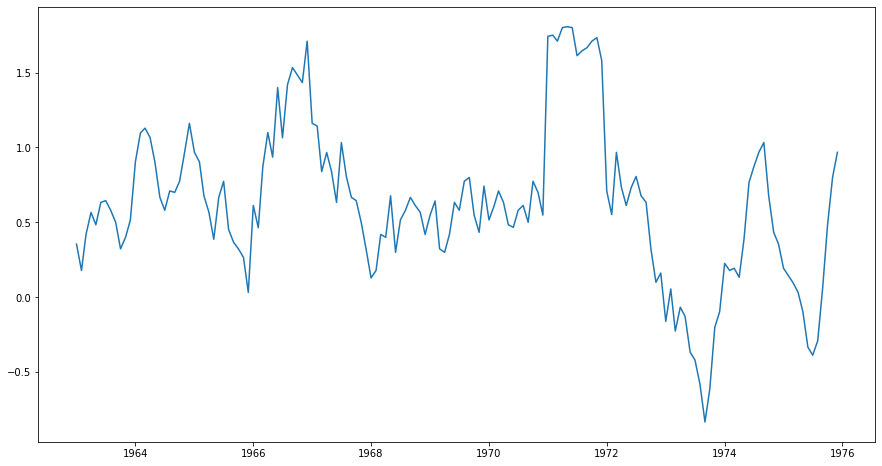

In [23]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
_ = plt.plot(milk.index, milk.daily_diff12)

In [24]:
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

<ipython-input-25-b1a8af28cbc8>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff12_1 = milk.daily_diff12 - milk.daily_diff12.shift(1)


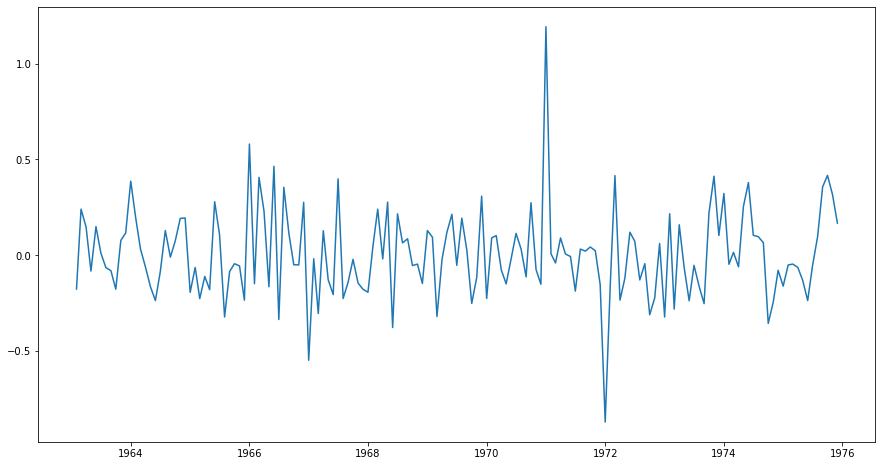

In [25]:
milk.daily_diff12_1 = milk.daily_diff12 - milk.daily_diff12.shift(1)
_ = plt.plot(milk.index, milk.daily_diff12_1)

In [26]:
sm.tsa.stattools.adfuller(milk.daily_diff12_1.dropna())

(-5.481326334796926,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.905137509892256)

Для стационарного ряда из предыдущего вопроса постройте график автокорреляционной функции.  
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

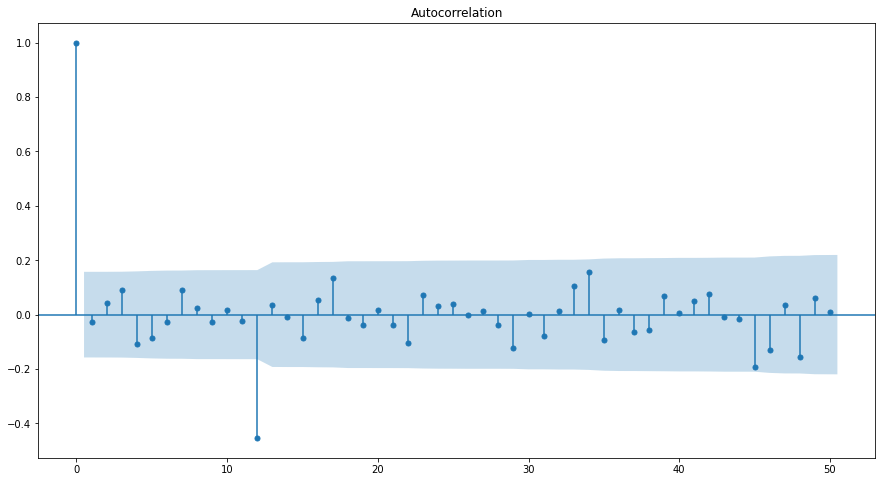

In [31]:
sm.graphics.tsa.plot_acf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50);

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

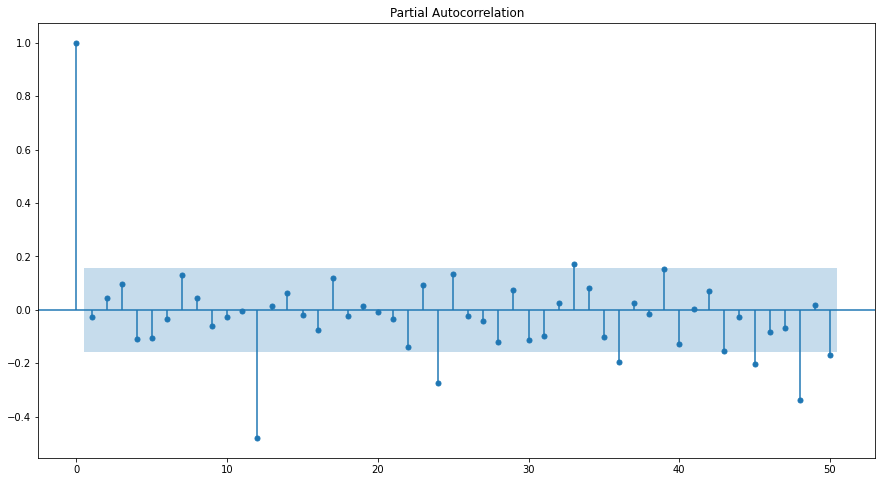

In [32]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50);